In [1]:
#new stuff to import! how exciting
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [20]:
path= r'C:\Users\evras\Desktop\Data Analysis\Immersion\A4 Python\Instacart Basket Analysis'

In [21]:
df=pd.read_pickle(os.path.join(path,'02 Data','Preped Data','orders_products_starplatinum.pkl'))

In [22]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spent,spender_level,median_usage,customer_frequency
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,both,mid-range product,Regular Busy,Average Orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,mid-range product,Second Slowest Day,Average Orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,mid-range product,Second Slowest Day,Most orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,mid-range product,Slowest Day,Average Orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,mid-range product,Slowest Day,Most orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer


In [23]:
df.shape

(32404859, 23)

## Bars

<AxesSubplot:>

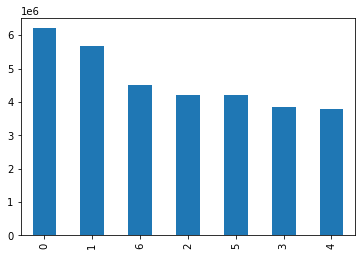

In [24]:
df['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

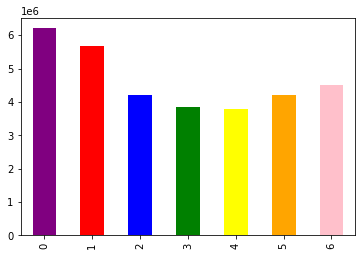

In [25]:
df['order_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','blue','green', 'yellow', 'orange','pink'])

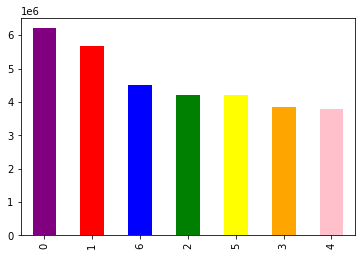

In [26]:
bar=df['order_day_of_week'].value_counts().plot.bar(color=['purple','red','blue','green', 'yellow', 'orange','pink'])

In [30]:
bar.figure.savefig(os.path.join(path,'04 Analysis','Viz', 'bar_orders_dow.png'))

## histograms!

In [35]:
df2=df[['order_id','user_id','prices']]

In [36]:
df2.loc[df['prices']>100]

,order_id,user_id,prices
10030345,912404,17,14900.0
10030346,603376,17,14900.0
10030347,3264360,135,14900.0
10030348,892534,135,14900.0
10030349,229704,342,14900.0
...,...,...,...
29166209,2249946,204099,99999.0
29166210,2363282,204099,99999.0
29166211,3181945,204395,99999.0
29166212,2486215,205227,99999.0


In [37]:
df.loc[df['prices']>100,'prices']=np.nan

In [38]:
df['prices'].max()

25.0

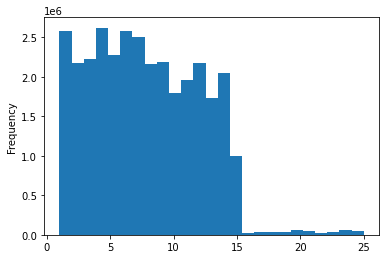

In [39]:
hist=df['prices'].plot.hist(bins=25)

In [40]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Viz', 'prices_histo.png'))

<AxesSubplot:xlabel='prices', ylabel='department_id'>

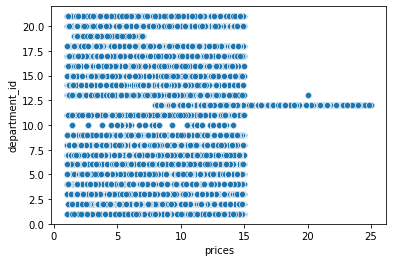

In [47]:
sns.scatterplot(x='prices',y='department_id',data=df)

In [48]:
df2=df[:2000000]

## sampling

In [49]:
np.random.seed(4)
dev=np.random.rand(len(df))<=0.7

In [50]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [51]:
big=df[dev]
small=df[~dev]

In [52]:
df.shape

(32404859, 23)

In [53]:
big.shape

(22683761, 23)

In [54]:
small.shape

(9721098, 23)

In [56]:
len(big)+len(small)

32404859

In [57]:
dfsmall=small[['order_day_of_week','prices']]
dfbig=big[['order_day_of_week','prices']]

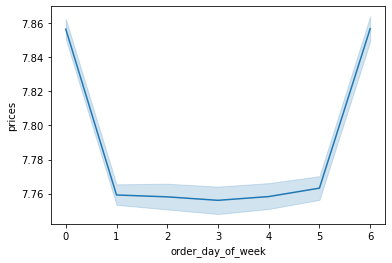

In [59]:
line= sns.lineplot(data=dfsmall,x='order_day_of_week',y='prices')